<a href="https://colab.research.google.com/github/Ademola409/Geospatial_data_science/blob/main/Corona_Tweet_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/DataScience'

/content/drive/MyDrive/DataScience


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
sns.set()

In [ ]:
import nltk

In [ ]:
nltk.download_shell()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars

      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [ ]:
raw_data= pd.read_csv('Corona_NLP_test.csv')
raw_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
raw_data.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,3798.000000,3798.000000,2964,3798,3798,3798
unique,NaN,NaN,1717,15,3798,5
top,NaN,NaN,United States,13-03-2020,TRENDING: New Yorkers encounter empty supermar...,Negative
freq,NaN,NaN,75,1233,1,1041
mean,1899.500000,46851.500000,NaN,NaN,NaN,NaN
std,1096.532489,1096.532489,NaN,NaN,NaN,NaN
min,1.000000,44953.000000,NaN,NaN,NaN,NaN
25%,950.250000,45902.250000,NaN,NaN,NaN,NaN
50%,1899.500000,46851.500000,NaN,NaN,NaN,NaN
75%,2848.750000,47800.750000,NaN,NaN,NaN,NaN


In [ ]:
raw_data.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [ ]:
data_no_mv= raw_data.dropna(axis=0)

In [ ]:
corona_cleaned=data_no_mv.reset_index(drop=True)

In [ ]:
corona_cleaned['text length']= corona_cleaned['OriginalTweet'].apply(len)

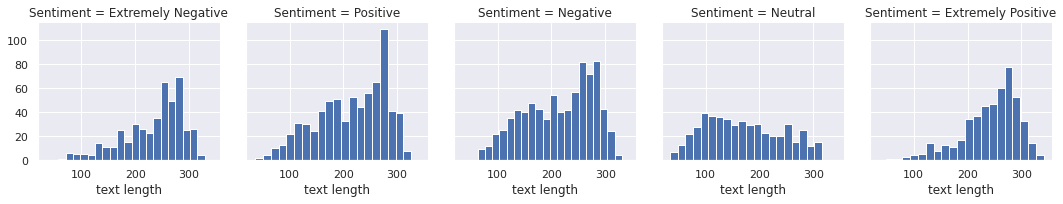

In [ ]:
tweetHist=sns.FacetGrid(corona_cleaned, col='Sentiment')
tweetHist.map(plt.hist, 'text length', bins=20)

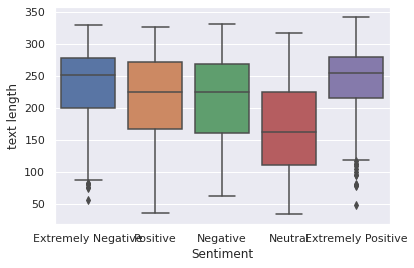

In [ ]:
sns.boxplot(x='Sentiment', y='text length', data=corona_cleaned)

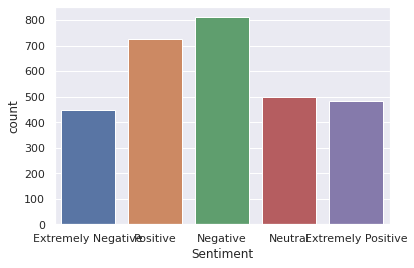

In [ ]:
sns.countplot(x='Sentiment', data=corona_cleaned)

In [ ]:
sentiment=corona_cleaned.groupby('Sentiment').mean()
sentiment

,UserName,ScreenName,text length
Sentiment,,,
Extremely Negative,1949.503341,46901.503341,234.389755
Extremely Positive,1936.850622,46888.850622,242.663900
Negative,1824.313194,46776.313194,213.819975
Neutral,1966.325956,46918.325956,169.315895
Positive,1893.426207,46845.426207,214.106207


In [ ]:
sentiment.corr()

,UserName,ScreenName,text length
UserName,1.000000,1.000000,-0.145995
ScreenName,1.000000,1.000000,-0.145995
text length,-0.145995,-0.145995,1.000000


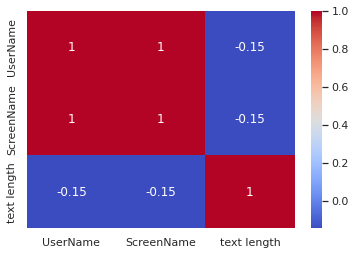

In [ ]:
sns.heatmap(sentiment.corr(), cmap='coolwarm', annot=True)

In [ ]:
corona_cleaned['Sentiment'].replace(to_replace={'Extremely Positive':'Positive', 'Extremely Negative':'Negative'}, inplace= True)

In [ ]:
new_sentiment_data=corona_cleaned.copy()

In [ ]:
new_cleaned_class=new_sentiment_data[(new_sentiment_data['Sentiment']=='Positive')|(new_sentiment_data['Sentiment']=='Negative')]

In [ ]:
sentiment_class=new_cleaned_class.reset_index(drop=True)

In [ ]:
sentiment_class.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text length
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Negative,228
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,193
2,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,318
3,10,44962,"Dublin, Ireland",04-03-2020,Anyone been in a supermarket over the last few...,Positive,238
4,11,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive,233


In [ ]:
sentiment_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       2467 non-null   int64 
 1   ScreenName     2467 non-null   int64 
 2   Location       2467 non-null   object
 3   TweetAt        2467 non-null   object
 4   OriginalTweet  2467 non-null   object
 5   Sentiment      2467 non-null   object
 6   text length    2467 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 135.0+ KB


In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
def text_process(tweet):
  nopunc=[char for char in tweet if char not in string.punctuation ]
  nopunc=''.join(nopunc)
  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
sentiment_class['OriginalTweet'].apply(text_process)

0       [TRENDING, New, Yorkers, encounter, empty, sup...
1       [couldnt, find, hand, sanitizer, Fred, Meyer, ...
2       [Panic, buying, hits, NewYork, City, anxious, ...
3       [Anyone, supermarket, last, days, Went, NORMAL...
4       [Best, quality, couches, unbelievably, low, pr...
                              ...                        
2462    [Gov, Hogans, announcement, bars, restaurants,...
2463    [RicePolitics, MDCounties, Craig, call, Genera...
2464    [Meanwhile, Supermarket, Israel, People, dance...
2465    [panic, buy, lot, nonperishable, items, ECHO, ...
2466    [ForestandPaper, members, committed, safety, e...
Name: OriginalTweet, Length: 2467, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_transformer=CountVectorizer(analyzer=text_process ).fit(sentiment_class['OriginalTweet'])

In [ ]:
print(len(bow_transformer.vocabulary_))

12932


In [ ]:
tweet4=sentiment_class['OriginalTweet'][4]
print(tweet4)










#DJSBU https://t.co/HhDJhyQ2Dc


In [ ]:
tweet_bow_transform=bow_transformer.transform([tweet4])
print(tweet_bow_transform)

  (0, 15)	1
  (0, 276)	1
  (0, 292)	1
  (0, 655)	1
  (0, 692)	1
  (0, 1148)	1
  (0, 1205)	1
  (0, 1738)	1
  (0, 3058)	1
  (0, 3430)	1
  (0, 3715)	1
  (0, 4193)	1
  (0, 4724)	1
  (0, 5720)	1
  (0, 7692)	1
  (0, 8712)	1
  (0, 9227)	1
  (0, 9855)	1
  (0, 10375)	1
  (0, 10523)	1
  (0, 12267)	1


In [ ]:
bow_transformer.get_feature_names()[4968]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'bonds'

In [ ]:
corona_bow=bow_transformer.transform(sentiment_class['OriginalTweet'])

In [ ]:
print('Shape of Sparse Matrix: ', corona_bow.shape)

Shape of Sparse Matrix:  (2467, 12932)


In [ ]:
corona_bow.nnz

50088

In [ ]:
sparsity=(100.0 * corona_bow.nnz/ (corona_bow.shape[0] * corona_bow.shape[1]))
print('sparsity:{}'.format(sparsity))

sparsity:0.15699970824283574


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf_transformer=TfidfTransformer().fit(corona_bow)

In [ ]:
tfidf4=tfidf_transformer.transform(tweet_bow_transform)
print(tfidf4)

  (0, 12267)	0.2485366885079598
  (0, 10523)	0.2101827912215787
  (0, 10375)	0.09987025829687822
  (0, 9855)	0.1609091313715883
  (0, 9227)	0.15839137529791025
  (0, 8712)	0.19926302865796935
  (0, 7692)	0.2485366885079598
  (0, 5720)	0.2485366885079598
  (0, 4724)	0.15839137529791025
  (0, 4193)	0.22731567828008675
  (0, 3715)	0.2485366885079598
  (0, 3430)	0.2485366885079598
  (0, 3058)	0.2485366885079598
  (0, 1738)	0.2361231932972339
  (0, 1205)	0.2485366885079598
  (0, 1148)	0.05889220340158823
  (0, 692)	0.2485366885079598
  (0, 655)	0.19926302865796935
  (0, 292)	0.2485366885079598
  (0, 276)	0.2485366885079598
  (0, 15)	0.2485366885079598


In [ ]:
corona_tfidf=tfidf_transformer.transform(corona_bow)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
tweet_sentiment_model=MultinomialNB().fit(corona_tfidf, sentiment_class['Sentiment'])

In [ ]:
tweet_sentiment_model.predict(corona_tfidf)

array(['Negative', 'Positive', 'Negative', ..., 'Positive', 'Negative',
       'Positive'], dtype='<U8')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
tweet_train, tweet_test,label_train, label_test= train_test_split(sentiment_class['OriginalTweet'], sentiment_class['Sentiment'], test_size=0.2, random_state=101)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline=Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifer', MultinomialNB())
])

In [ ]:
pipeline.fit(tweet_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f6ca4a1d200>)),
                ('tfidf', TfidfTransformer()), ('classifer', MultinomialNB())])

In [ ]:
predictions= pipeline.predict(tweet_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

    Negative       0.72      0.80      0.76       119
    Positive       0.79      0.71      0.75       128

    accuracy                           0.75       247
   macro avg       0.76      0.75      0.75       247
weighted avg       0.76      0.75      0.75       247

